<a href="https://colab.research.google.com/github/i-anujkumar/superstore-sales-analysis/blob/main/Sales_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


#Goal: See how sales changed month by month


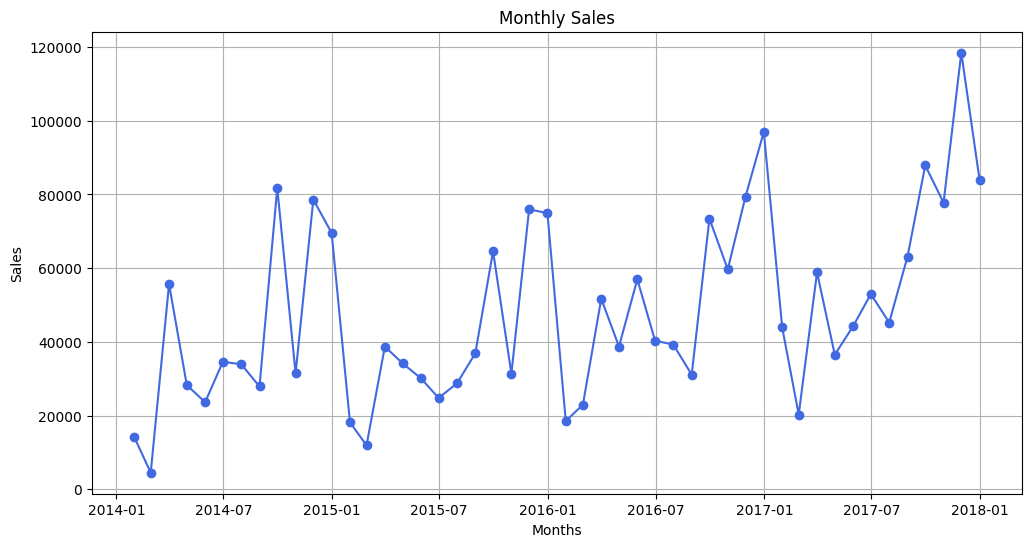

In [ ]:
#'M' is deprecated and will be removed in a future version, please use 'ME' instead.
monthly_sales = df.set_index('Order Date').resample('ME')['Sales'].sum()

plt.figure(figsize = (12, 6))
plt.plot(monthly_sales, marker ='o', color='royalblue')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#➤ Goal: Compare how different categories and sub-categories contribute to sales

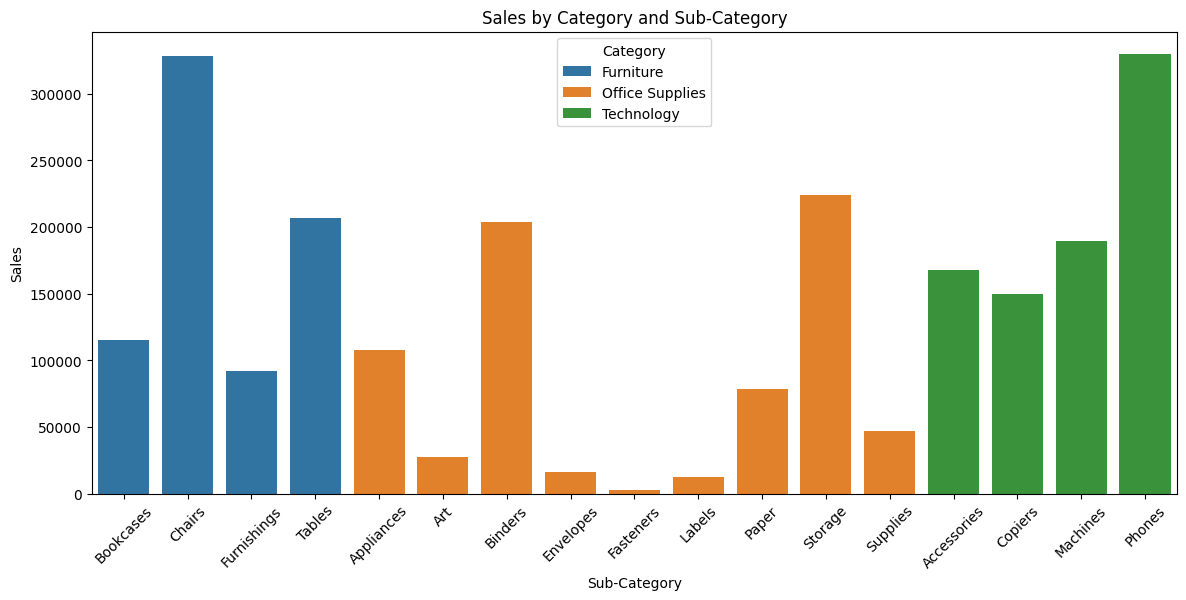

In [ ]:
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data = category_sales, x='Sub-Category', y ='Sales', hue ='Category')
plt.title('Sales by Category and Sub-Category')
plt.xticks(rotation =45)
plt.show()

Profit by region

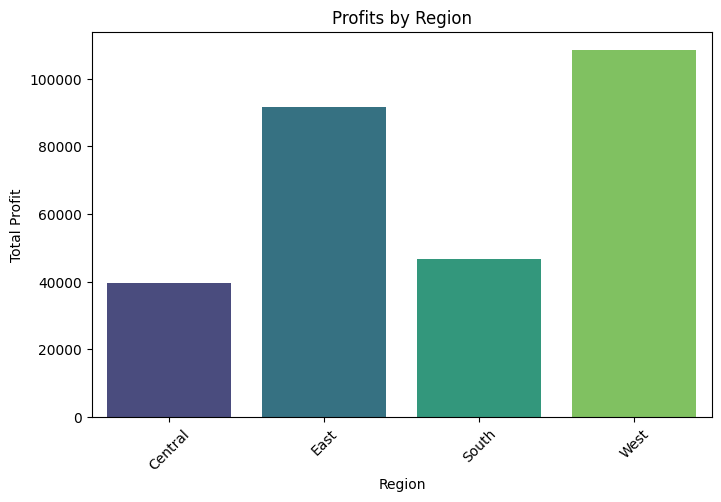

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(data = region_profit, x='Region', y ='Profit', palette='viridis', hue='Region', legend=False)
plt.title('Profits by Region')
plt.ylabel('Total Profit')
plt.xticks(rotation =45)
plt.show()


#Sales vs Profit

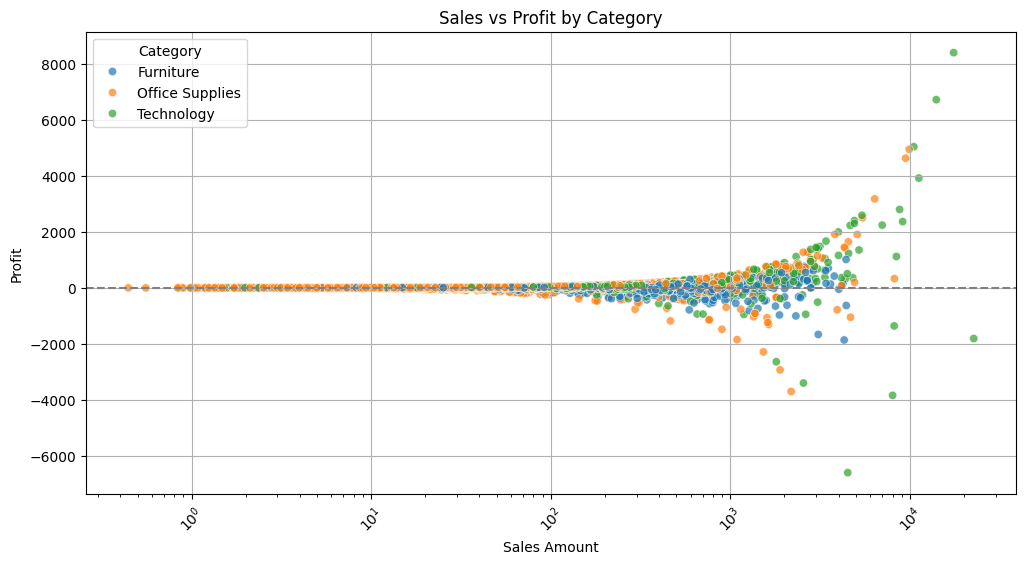

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data = df, x='Sales', y='Profit', hue = 'Category', alpha=0.7)
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales Amount')
plt.ylabel('Profit')
plt.xscale('log')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

#Products That Made a Loss
Filter products with negative profit

In [ ]:
from itertools import product
product_profit = df.groupby('Product Name').agg({
    'Profit': 'sum',
    'Category': 'first'
}).reset_index()
#Filter products with negative profit
loss_making_product = product_profit[product_profit['Profit']< 0]

loss_making_product = loss_making_product.sort_values('Profit')
loss_making_product.head()

,Product Name,Profit,Category
475,Cubify CubeX 3D Printer Double Head Print,-8879.9704,Technology
985,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730,Technology
476,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,Technology
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156,Furniture
376,Bush Advantage Collection Racetrack Conference...,-1934.3976,Furniture


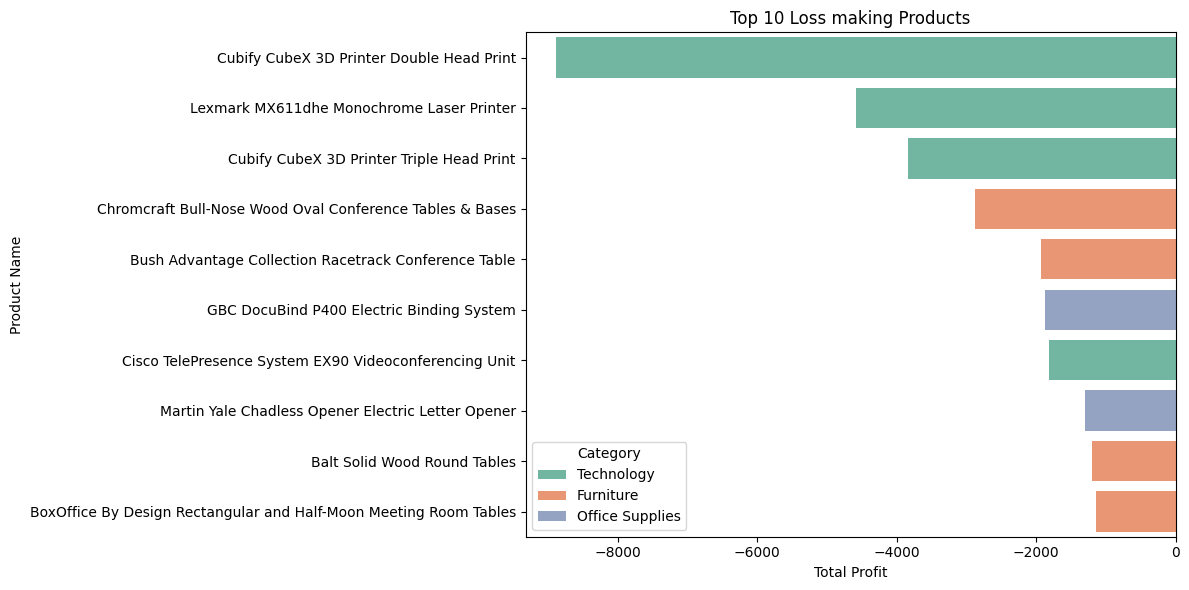

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data = loss_making_product.head(10),
    x='Profit',
    y='Product Name',
    hue='Category',
    dodge=False,
    palette='Set2'
    )
plt.title("Top 10 Loss making Products")
plt.xlabel('Total Profit')

plt.legend(title='Category')
plt.tight_layout()
plt.show()

Sales according to cities


In [ ]:
city_profit = df.groupby('City')['Profit'].sum().reset_index()
# Top 10 cities by profit
top_profit_cities = city_profit.sort_values('Profit', ascending =False).head(10)
# Top 10 cities by Loss
top_loss_cities = city_profit.sort_values('Profit').head(10)

#Best profitable cities

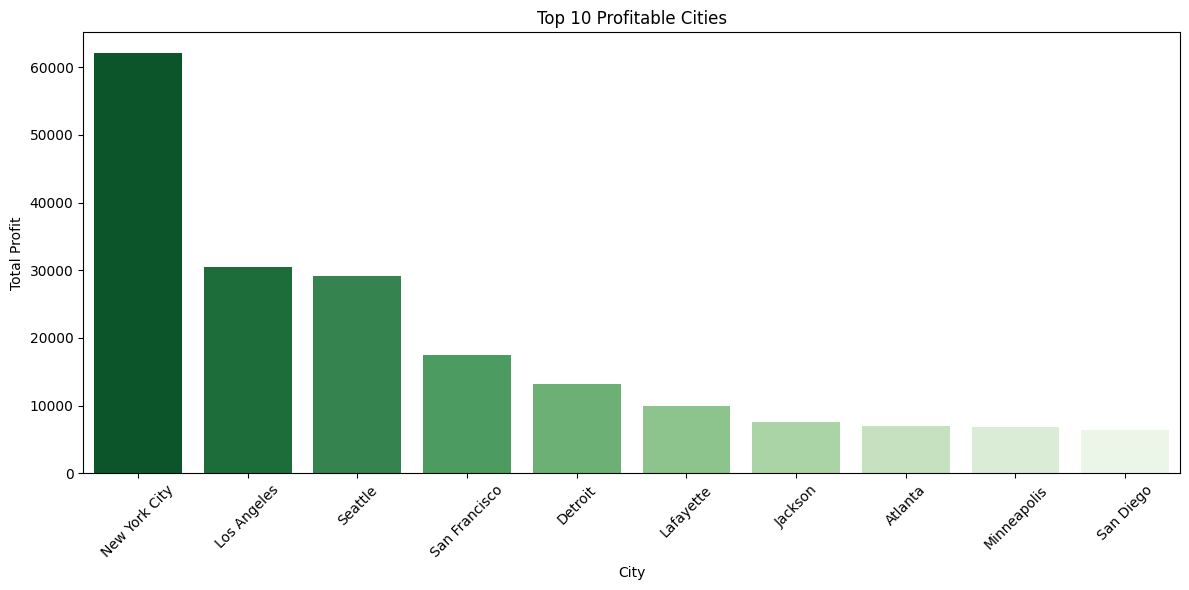

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = top_profit_cities, x='City', y ='Profit', palette='Greens_r', hue='City', legend=False)
plt.title('Top 10 Profitable Cities')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

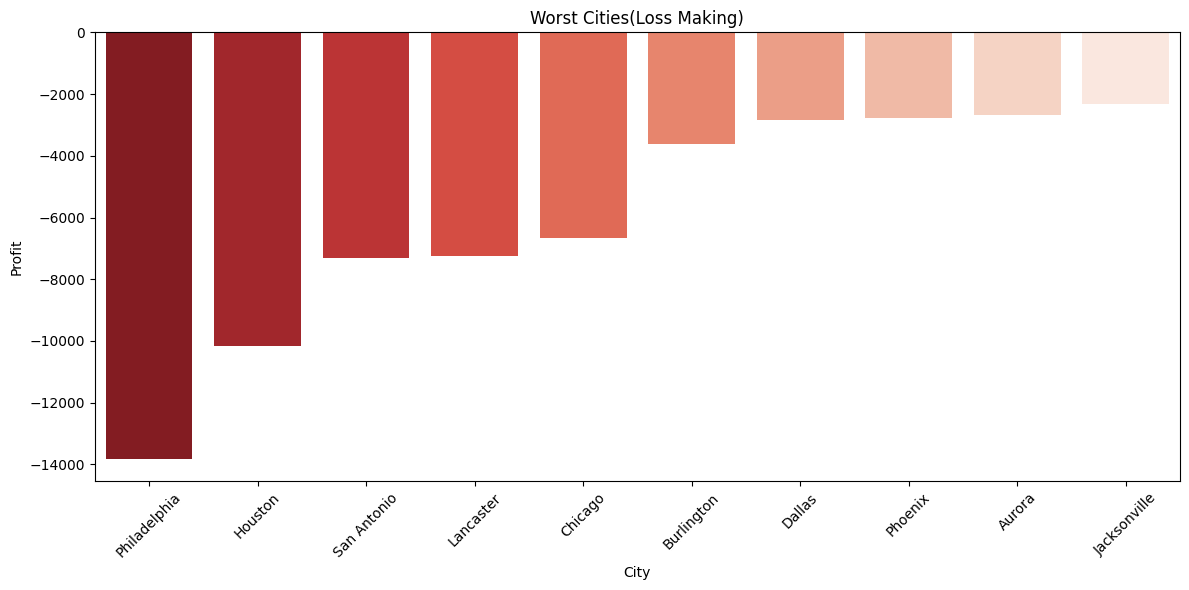

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_loss_cities, x='City', y='Profit', hue='City', legend=False, palette ='Reds_r')
plt.title('Worst Cities(Loss Making)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Create KPI Summary Cards (Key Metrics)
These give instant insight into business health:

*   ✅ Total Sales
*   ✅ Total Profit
*   ✅ Avg. Discount
*   ✅ No. of Orders
*   ✅ Best Category / Region







In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()
total_orders = df['Order ID'].nunique()

#top customers

In [ ]:
top_customers_sales = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values('Sales', ascending = False).head(10)

In [ ]:
top_customers_profit = df.groupby('Customer Name')['Profit'].sum().reset_index().sort_values('Profit', ascending = False).head(10)

# Discount vs profit graph

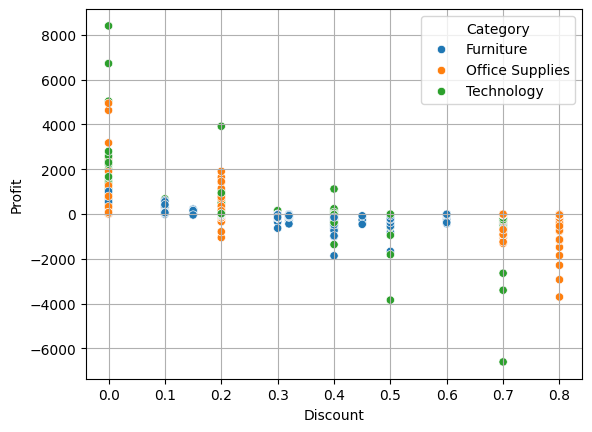

In [ ]:
sns.scatterplot(data=df, x='Discount', y ='Profit', hue='Category')
plt.grid(True)

#  Segment and Region Level Breakdown
Use heatmaps or bar charts to see where to focus marketing or cost control.

<Axes: xlabel='Region', ylabel='Segment'>

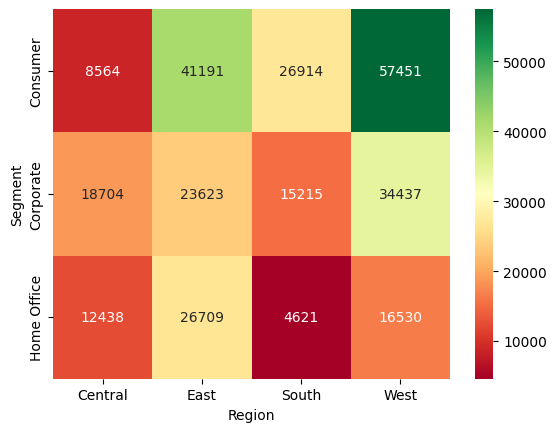

In [ ]:
pivot = df.pivot_table(values ='Profit', index='Segment', columns='Region', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='RdYlGn')